## 소리 데이터에 대한 이해

In [4]:
import librosa

In [5]:
import sounddevice as sd

In [ ]:
!pip3 install matplot

In [6]:
example_file_path = librosa.ex('trumpet')
print(f'예제 파일은 다음 위치에 있습니다\n파일 경로: {example_file_path}')

예제 파일은 다음 위치에 있습니다
파일 경로: /Users/henris/Library/Caches/librosa/sorohanro_-_solo-trumpet-06.ogg


In [7]:
y, sr = librosa.load(example_file_path)

/Users/henris/.pyenv/versions/3.7.3/envs/scream/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [8]:
sd.play(y)

In [9]:
print(f'y : {y}\nsampling_rate : {sr}')

y : [-0.00140381 -0.00045776 -0.00039673 ...  0.          0.
  0.        ]
sampling_rate : 22050


In [10]:
print(f'y는 {len(y)} 길이의 벡터')

y는 117888 길이의 벡터


In [11]:
print(f'y의 앞 20개 값은?\n{y[:20]}')

y의 앞 20개 값은?
[-1.4038086e-03 -4.5776367e-04 -3.9672852e-04  9.1552734e-05
  3.0517578e-05 -1.8310547e-04 -3.6621094e-04  1.5258789e-04
  5.1879883e-04  1.4953613e-03  1.8615723e-03  9.1552734e-04
 -3.9672852e-04 -2.0446777e-03 -1.2817383e-03 -5.4931641e-04
  8.8500977e-04  9.7656250e-04  1.0070801e-03 -1.2817383e-03]


In [12]:
print(f'y는 {len(y) / sr} 초의 신호 벡터!')

y는 5.346394557823129 초의 신호 벡터!


In [13]:
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
sr

22050

In [11]:
x = [i / sr for i in range(len(y))]

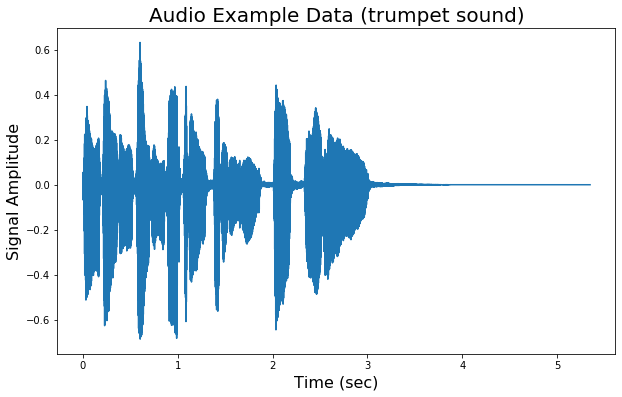

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

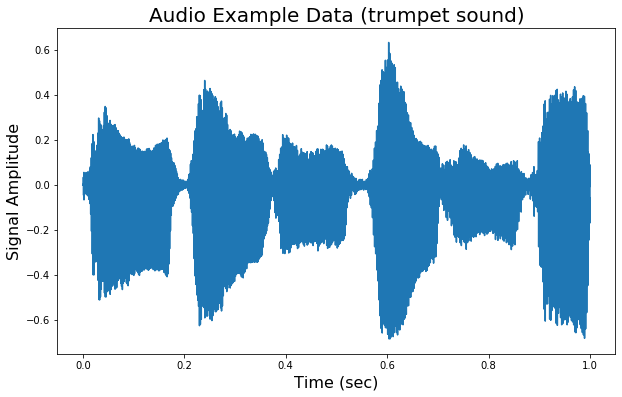

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

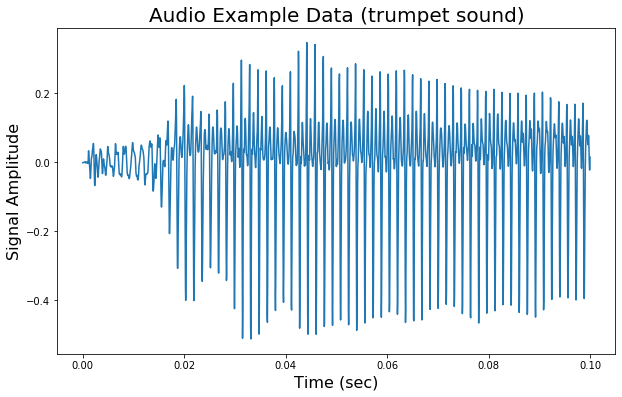

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x[: sr // 10], y[: sr // 10])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

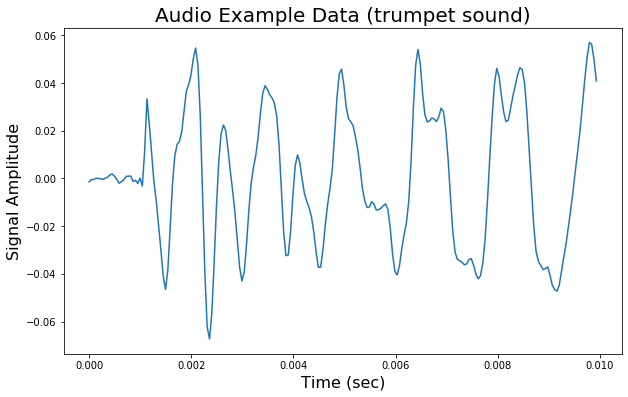

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x[: sr // 100], y[: sr // 100])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

In [13]:
sd.play(y)